# Assignment: Data Wrangling Nora Wiktorowicz
### `! git clone https://github.com/ds4e/wrangling`
### Q1, Q2, and Q3

# **Q1.**

This question provides some practice cleaning variables which have common problems.

***1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?) ***


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 63 (delta 2), reused 0 (delta 0), pack-reused 58 (from 2)
Receiving objects: 100% (63/63), 13.96 MiB | 14.43 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [3]:
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory = False)
print(df.shape, '/n')
df.head()

(30478, 13) /n


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [4]:
price = df['Price'] # we want to assign price column to price variable, and look at price variable
price.unique() # we need to get unique values from columns, and find any outliers/formatting errors
price = price.str.replace(",", "") # we must remove commas to ensure consistent formatting (using the example in the question, if a price goes from 675 to 1,112 the formatting turns it to 1112)
print(price.unique(), '\n') # we check if removing the commas was successful
price = pd.to_numeric(price, errors='coerce') # this converts all values to a number format. Any invalid entries becomes NaN
print(price.unique(), '\n') # we check if converting values to numeric format was successful
missing = sum(price.isnull()) # we see if there are any missing values, this finds the total missing values
print(missing) # this print all missing values

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

After cleaning the price data, there are 0 missing values that we end up with. As stated in my coding notes, I cleaned the data by removing commas to address the concern of the price increasing from 675 to 1112 (as stated in the question). Next, I used coerce to ensure that any invalid numbers turned to NaN. Overall, this cleans the data by improving consistency and quality.

***2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? ***


In [5]:
df = pd.read_csv('/content/wrangling/assignment/data/mn_police_use_of_force.csv', low_memory = False)
print(df.shape, '/n')
df.head()

(12925, 13) /n


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [6]:
subject_injury = df['subject_injury']  # We want to look at the 'subject_injury' variable
unique_values = subject_injury.unique() #We want to get unique variables from the subject_inquiry column
missing_count = df['subject_injury'].isnull().sum() #We want to find the sum of how many subject_injury's are missing so we know if removing these would be a major problem
print(missing_count) #Get the number of how many of these subject injury reports are missing, it is 9,848
total_rows = df.shape[0]
missing_percentage = (missing_count / total_rows) * 100 #We calculate what the percentage of missing values is compared to the total number of rows
print(missing_percentage) #We see that 76.19% of the subject_inquirys are missing. This is a concern.
cross_tabulate = pd.crosstab(df['subject_injury'], df['force_type'], dropna=False) #Cross tabulate the cleaned subject_inquiry variable with the force_type variable to find any patterns
print("\nCross-tabulation of 'subject_injury' with 'force_type':")
print(cross_tabulate)



9848
76.19342359767892

Cross-tabulation of 'subject_injury' with 'force_type':
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   
NaN                 2          7051               1421        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Yes                            44                 40            0   
NaN                            27                 74           87   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                            0   
Yes                      

If 76.19% of the subject_injury variables are missing (aligning with my calculations), this is very concerning to our data quality. This would mitigate the reliability of any conclusions we were to form regarding injuries and police brutality, as only about 15% of the data would be able to be used for analysis. Furthermore, there are many implied reasons behind this missing data, including issues with collection or human biases, both of which would have negative implications on the quality of our analytical conclusions. In the future, the subject_injury varibales that are missing could be dropped utilizing code. However, for the purpose of this assignment I did not drop them, so that I could compare the number of NaN variables with the force type used on the subjects.

After cross-tabulating the subject_injury data with the force_type data, there is one main conclusion I formed regarding patterns where data is missing. We see much higher missing subject_injury variables with police-led force, compared to K9 force. For example, there are more injuries reported with "Police K9 Bite" then NaN variables (44 injuries reported yes, 2 reported no, and only 31 NaN). However, with techniques led by human police officers, there are very high levels of NaN variables. For example, with "bodily force" there are 2,379 reports for the subject_injury variable (1093 no injury and 1286 yes injury), and 7051 NaN (almost triple the number of reports). This may be because of liability purposes; police offices and officers may be more secure with their data regarding human force due to police brutality concerns. However, it is easier to display K9 data, as the dogs have less personal liability and concern for this data to be released.

**3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.**


In [9]:
url = 'https://github.com/DS3001/wrangling/raw/refs/heads/main/data/justice_data.parquet'
pretrial = pd.read_parquet(url, engine = 'pyarrow')
print(pretrial.shape, '\n')
pretrial.head()

HTTPError: HTTP Error 504: Gateway Time-out

In [30]:
released = pretrial['WhetherDefendantWasReleasedPretrial'] #Extract the WhetherDefendantWasReleasedPretrial variable
print(released.unique())
print(released.value_counts())

[9 0 1]
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64


In [31]:
released = released.replace(9, np.nan) # the 9's are unclear in codebook PDF, we should replace these missing with NaN as stated in instructions above
print(released.value_counts(),'\n')
missing = sum(released.isnull()) # we need to find the total missing values
print(f"Missing values: {missing}") # print total missing values

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64 

Missing values: 31


In [32]:
pretrial['released'] = released #next, we clean the data by replacing the missing values with the cleaned values
del released

**4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)**

In [10]:
sentence = pretrial['ImposedSentenceAllChargeInContactEvent'] #Extract the ImposedSentenceAllChargeInContactEvent variable
print(sentence.unique(),'\n')
sentence = pd.to_numeric(sentence, errors = 'coerce') #Convert variable to numeric value and coerce to replace missing values with NaN
length_missing = sum(sentence.isnull())
print(length_missing, '\n')

NameError: name 'pretrial' is not defined

In [36]:
sentence_na = sentence.isnull() #cross tabalute to see how many instances have missing values or not
print(pd.crosstab(sentence_na, type), '\n')

col_0                                   <class 'type'>
ImposedSentenceAllChargeInContactEvent                
False                                            13933
True                                              9053 



In [45]:
sentence = sentence.mask(type_col == 4, 0) # we make the length 0 when the type is 4 because it means the charges have been dismissed
sentence = sentence.mask(type_col == 9, np.nan) # the length is replaced with np.nan when the type is 9, because it is unclear in the codebook
sentence_na = sentence.isnull()
print(pd.crosstab(sentence_na, type_col), '\n')

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274 



In [46]:
sentence_missing = sum(sentence.isnull())
print(sentence_missing, '\n') #check how many are now missing, it is now 274 meaning that we successfully reduced the number of missing variables

274 



# EXPLAIN WHY

# **Q2.**

Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

**1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.**


In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/norawik/wrangling/main/Sharks.csv'
sharks = pd.read_csv(url, low_memory=False)
print(sharks.shape, '\n')
sharks.head()

(39072, 255) 



,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254
0,23-Jan-25,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22-Jan-25,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-Jan-25,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2-Jan-25,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2-Jan-25,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2. Drop any columns that do not contain data.**


In [15]:
df = df.dropna(axis=1, how='all')
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


**3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?**

In [28]:
sharks['Year'] = sharks['Year'].astype(str).str.slice(0,4) # Replace df with sharks
year = pd.to_numeric(sharks['Year'], errors='coerce')  #convert to numeric values, turn non-numeric values to NaN # Replace df with sharks
sharks['Year'] = sharks['Year'].replace(0, np.nan) #convert all values with 0 to NaN, since that is not a valid year # Replace df with sharks
missing_years = sharks['Year'].isnull().sum() #check for missing values # Replace df with sharks
print(missing_years)
year_range = sharks['Year'].min(), sharks['Year'].max() #find the range of values # Replace df with sharks
print(year_range)
df.head()

0
('1940', 'nan')


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [29]:
sharks_since_1940 = sharks[sharks['Year'] >= '1940'] #filter by attacks happening since 1940
attacks_per_year = sharks_since_1940.groupby('Year').size() #compare the number of attacks per year to determine if they are increasing or decreasing overtime
early_attacks = attacks_per_year.iloc[0]  #find the number of attacks in the first year of dataset
current_attacks = attacks_per_year.iloc[-1]  #find number of attacks in last/most current year of dataset
if current_attacks > early_attacks:
    print("Attacks are increasing over time")
elif current_attacks < early_attacks:
    print("Attacks are decreasing over time")
else:
    print("Attacks are constant over time")

Attacks are increasing over time


The range of values of shark attacks I see overtime is year 1500 to 2025. Attacks are decreasing overtime.

**4. Clean the Age variable and make a histogram of the ages of the victims.**

In [33]:
sharks['Age'] = pd.to_numeric(sharks['Age'], errors='coerce') #extract age variable and coerce any errors
sharks = sharks.dropna(subset=['Age']) # Use sharks instead of df to drop rows with missing Age
missing_ages = sharks['Age'].isnull().sum()  # check for missing values
print(sharks['Age'].unique()) # Changed to print missing_ages to get the count of missing values # Use sharks instead of df, and print unique ages as intended

[12. 37. 23. 40. 28. 69. 48. 57. 24. 45. 61. 27. 38. 16. 33. 30. 15. 41.
 14. 26. 18. 21. 49. 25. 46. 19. 20. 65. 64. 13. 11. 32. 29. 10. 62. 39.
 22. 66. 52. 44. 47. 55. 59.  8. 50. 34.  9. 35. 77. 60. 42. 73. 58. 67.
 17.  6. 53. 68. 43. 51. 31. 56. 36.  7. 71. 54. 75. 70.  4. 63. 74.  3.
 82. 72.  5. 86. 84. 87.  1. 81. 78.]


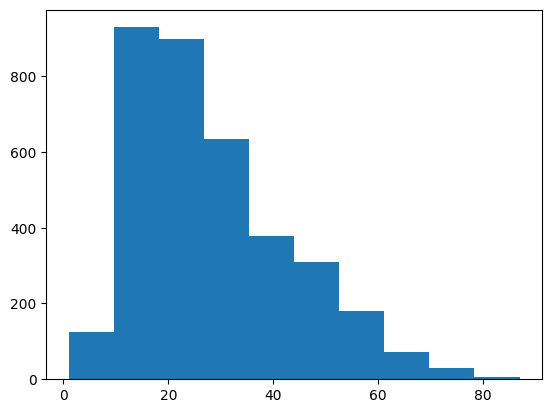

In [36]:
import matplotlib.pyplot as plt
plt.hist(sharks['Age'])
plt.show()

**5. What proportion of victims are male?**

In [37]:
df = pd.DataFrame(sharks)
victim_count = df['Sex'].count()
male_victims = df[df['Sex'] == 'M']['Sex'].count() #find the number of victims who are male
proportion_male = male_victims / victim_count #calculate the proportion of male victims
print(proportion_male) #About 85% of the victims are male

0.844671201814059


**6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?**

In [48]:
type = sharks['Type'] # examine type variable
type.value_counts() # find counts of each type of attack
type = type.replace(['Sea Disaster', 'Boat', 'Boating', 'Boatomg', 'Watercraft'], 'Watercraft Incidents') #categorize watercraft incidents
type = type.replace(['Invalid', 'Questionable', 'Unconfirmed', 'Unverified', '?'], np.nan) #categorize unclear incidents
type = type.replace(['Watercraft Incidents', 'Sea Disaster'], 'Unknown')  # Group watercraft-related incidents as Unknown to clean type variable so it only takes three values
type = type.replace(['Invalid', 'Questionable', 'Unconfirmed', 'Unverified', 'Under investigation'], 'Unknown')
type = type.replace([x for x in type.unique() if x not in ['Provoked', 'Unprovoked']], 'Unknown')
unprovoked_count = (type == 'Unprovoked').sum() #find proportion of unprovoked attacks
total_count = type.shape[0]
unprovoked_proportion = unprovoked_count / total_count
print(unprovoked_proportion)
print(type.value_counts())

0.8308988764044943
Type
Unprovoked    2958
Unknown        311
Provoked       291
Name: count, dtype: int64


After cleaning the Type variable so it only takes three values (provoked, unprovoked, unknown), we see that 83% of the shark attacks are unprovoked.


**7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.**


In [60]:
sharks['Fatal Y/N'] = sharks['Fatal Y/N'].astype(str).str.strip().str.upper()
sharks['Fatal Y/N'] = sharks['Fatal Y/N'].replace({'YES': 'Y', 'NO': 'N'})
sharks['Fatal Y/N'] = sharks['Fatal Y/N'].where(sharks['Fatal Y/N'].isin(['Y', 'N']), "Unknown")
print(sharks['Fatal Y/N'].value_counts())

Fatal Y/N
N          2819
Y           518
Unknown     223
Name: count, dtype: int64


**8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?**

In [18]:
unprovoked_attacks = sharks[sharks['Type'] == 'Unprovoked']  #Filter the number of unprovoked attacks
attack_by_sex = unprovoked_attacks['Sex'].value_counts() #Break this down by sex
print(attack_by_sex)



Sex
M      4311
F       670
M         2
 M        1
lli       1
Name: count, dtype: int64


In [23]:
# Group by attack type and calculate the fatality rate for each group (Provoked vs Unprovoked)
fatality_by_type = sharks['Type'].value_counts()
fatal_attacks = sharks[sharks['Fatal Y/N'] == 'Y']['Type'].value_counts()
fatality_rate = (fatal_attacks / fatality_by_type) * 100
print(fatality_rate)

# Display the proportion of fatal and non-fatal attacks for each attack type
print(fatality_by_type)

Type
 Provoked              50.000000
?                            NaN
Boat                         NaN
Invalid                 1.449275
Provoked                3.139717
Questionable           18.181818
Sea Disaster           69.834711
Unconfirmed                  NaN
Under investigation          NaN
Unprovoked             24.277120
Unverified                   NaN
Watercraft              3.098592
Name: count, dtype: float64
Type
Unprovoked             5153
Provoked                637
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64


In [91]:
fatality_by_sex = sharks.groupby('Sex')['Fatal Y/N'].value_counts(normalize=True).unstack().fillna(0)

# Display the proportion of fatal and non-fatal attacks for each sex
print(fatality_by_sex)

Fatal Y/N         N   Unknown         Y
Sex                                    
 M         1.000000  0.000000  0.000000
.          0.000000  0.000000  1.000000
F          0.760101  0.088384  0.151515
M          0.697310  0.081774  0.220916
M          1.000000  0.000000  0.000000
M x 2      0.000000  0.000000  1.000000
N          0.500000  0.000000  0.500000
lli        1.000000  0.000000  0.000000


From these insights, we can see that sharks are more likely to launch unprovoked attacks on men (4311 unprovoked attacks compared to the 670 launched on females).

**9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)**

In [92]:
sharks['Species'] = sharks['Species'].str.split()

# Check if 'white' and 'shark' are both present in the split list
sharks['Is_white_shark'] = sharks['Species'].apply(lambda x: 'white' in x and 'shark' in x)

# Calculate the proportion of attacks by white sharks
white_shark_proportion = sharks['Is_white_shark'].mean()

KeyError: 'Species'

# **Q3.**

Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

**1. Read the abstract. What is this paper about?**
  
"Tidy Data" by Hadley Wickham discusses how to make data cleaning more effective and seamless, specifically by improving the process of data tidying.The tidy data framework ensures that it is easier to tidy datasets and ensure the data structure is consistent.
  
  **2. Read the introduction. What is the "tidy data standard" intended to accomplish?**

The tidy data standard is intended to standardize the process of data cleaning. It aims to make it easier to approach the process, as you do not need to come up with a new approach each time.

  **3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."**

The first sentence, "like families, tidy datasets are all alike but every messy dataset is messy in its own way," implies that clean datasets all have similar issues, while a messy dataset has new and unique problems. Clean and tidy datasets that are standardized are consistent and organized. Messy datasets, however, do not follow the consistent format. The second sentence, "for a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general," means that it is usually easy to figure out aspects of a dataset (variables and observations or the data structure of rows and columns). However, it is challenging to to create a consistent standard and definition across multiple datasets and real-world applications.

4**. Read Section 2.2. How does Wickham define values, variables, and observations?**

Wickham defines values as individual points of data in a set, which are associated with a variable and an observation. These may be either numbers or strings. Variables are all values that measure the same underlying attribute, and observations contain all values on the same unit across attributes.


**5. How is "Tidy Data" defined in section 2.3?**

In Section 2.3, Wickham defines "Tidy Data" as a structure in which every variable forms a column, each observation forms a row, and each type of observational unit forms a table.

**6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?**

The 5 most common problems with messy datasets are:
1. Column headers are values not variables.
2. Multiple variables are stored in one column.
3. Variables are stored in both rows and columns.
4. Multiple types of observational units that should be seperated are in the same table.
5. One single observational unit is stored in multiple tables.

The data in table 4 is messy because the column headers represent values instead of variable names, addressing problem 1. Melting a dataset is when you transform a dataset where variables are spread across both rows and column into a form where each variable is represented by a column, and each observation forms a row.


**7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?**

Table 11 is considered messy because the days of the month are separate columns. They should be stored as values falling under one date variable. This is an affront to the tidy data principle where each variable should form a column. In contrast, Table 12 is considered molten as the days of the month have been melted into a singlular date variable. However, it is not tidy as the "element" column contains variable names instead of values. Table 12(b) is tidy as each row represents a single observation with all attributes as values.

**8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?**

The "chicken-and-egg" problem with focusing on tidy data means tidy data is only as useful as the tools that work with it. However, the tidy tools are dependent on having tidy data, meaning simultaneous progress is hard to achieve. Wickham explains that he hopes that further work will improve on his concept of tidy data, develop better data storage tools, and combine ideas in different fields.
